## Make a sine wave which at 44100 Hz sampling rate has a frequency of 400 Hz at 1 second duration. Hence we need 44100 samples, and 400 periods of our sinusoid in this second. Hence we can write our signal in Python as:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fs = 44100
f = 400.0
s = np.sin(2*np.pi*f*np.arange(0, 1, 1.0/fs))

### To listen to it, we use our sound library "sound.py“, which you can find on Moodle Webpage:

In [2]:
from sound import sound

In [3]:
sound((2**15)*s,fs)

* done


### Now plot the first 1000 samples: 

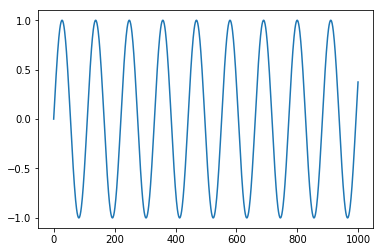

In [4]:
plt.plot(s[0:1000])

### Next plot the first 100 samples: 

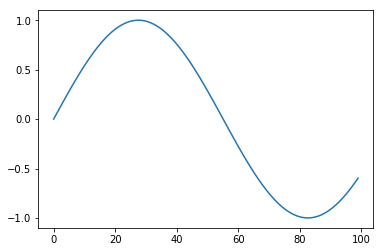

In [5]:
plt.plot(s[0:100])

Now we can multiply this sine tone signal with a unit pulse train, with N=8 i.e., downsampling while keeping the zeros.
### We generate the unit impulse train,

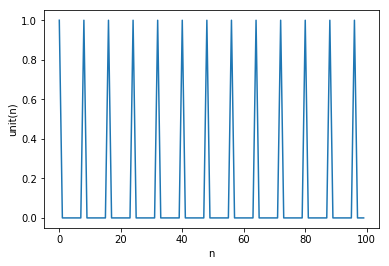

In [6]:
unit = np.zeros(44100)
unit[0::8] = 1
plt.plot(unit[0:100])
plt.xlabel('n')
plt.ylabel('unit(n)')

### Listen to it, with scaling to the value range for 16 bit/sample:

In [7]:
sound(unit*2.0**15,44100)

* done


### The multiplication with the unit impulse train:

In [8]:
sdu=s*unit

(This multiplication is also called „frequency mixing“).
### Now plot the result, the first 100 samples:


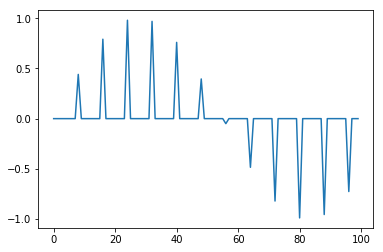

In [9]:
plt.plot(sdu[0:100])

This is our signal still with the zeros in it. Now take a look at the magnitude spectrum (in dB) of the original signal s:

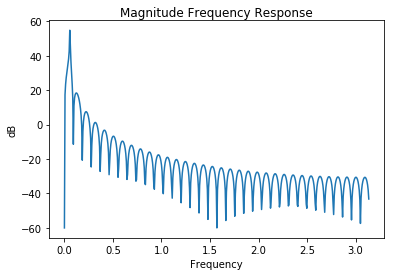

In [10]:
from scipy.signal import freqz
w, h = freqz(s)
plt.plot(w, 20*np.log10(np.abs(h) + 1e-3)) #Adding 1e-3 to avoid log(0)
plt.xlabel('Frequency')
plt.ylabel('dB')
plt.title('Magnitude Frequency Response')

The plot shows the magnitude of the frequency spectrum of our signal. Observe that the frequency axis (horizontal) is a normalized frequency, normalized to the Nyquist frequency as π , in our case 22050 Hz. Hence our sinusoid should appear as a peak at normalized frequency 400.0/22050$*$pi=0.05699, which we indeed see.
### Now we can compare this to our signal with the zeros, sdu:

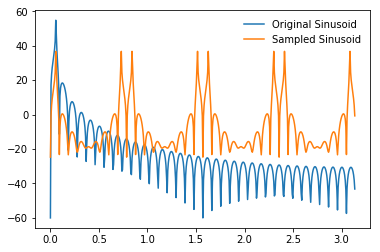

In [11]:
ws, hs = freqz(sdu) #ws, hs are normalized frequency and magnitude for sampled signal
plt.plot(w, 20*np.log10(np.abs(h) + 1e-3)) 
plt.plot(ws, 20*np.log10(np.abs(hs) + 1e-3))
plt.legend(('Original Sinusoid', 'Sampled Sinusoid'))

Here we can see the original line of our 400 Hz tone, and now also the 7 new aliasing components. Observe that always 2 aliasing components are close together. This is because the original 400 Hz tone also has a spectral peak at the negative frequencies, at -400 Hz, or at normalized frequency -0.05699.

### Now also listen to the signal with the zeros:

In [12]:
sound(sdu*2.0**15,44100)

* done


Here you can hear that it sounds quite different from the original, because of the strong aliasing components!


### Removing the zeros

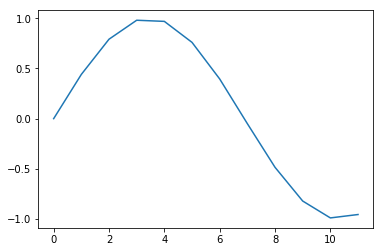

In [13]:
#Taking every 8th sample which in our case are the only non-zero values
sd = sdu[0:44100:8]
plt.plot(sd[0:100/8])

### We can now take a look at the spectrum with

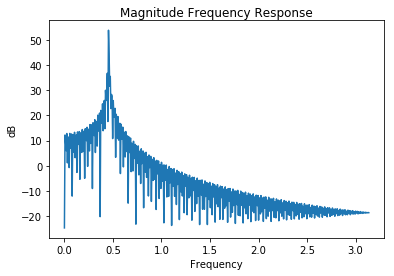

In [14]:
wd, hd = freqz(sd)
plt.plot(wd, 20*np.log10(np.abs(hd) + 1e-3))
plt.xlabel('Frequency')
plt.ylabel('dB')
plt.title('Magnitude Frequency Response')

Observe that the sine signal now appear at normalized frequency of 0.455, a factor of 8 higher than before, with the zeros in it, because we reduced the sampling rate by 8. This is because we now have a new Nyquist frequency of 22050/8 now, hence our normalized frequency becomes 400∗3.14/22050⋅8≈0.455 . This means removing the zeros scales or stretches our frequency axis.

Observe that here we only have 100/8≈12 samples left.